
#Hands-on Activity 9.2 Customized Visualizations using Seaborn

Submitted by: Dela Cruz, Eugene D.G.

Submitted to: Engr. Roman Richard


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes.csv')

In [31]:
quakes.assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
 "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<Axes: xlabel='magType', ylabel='mag'>

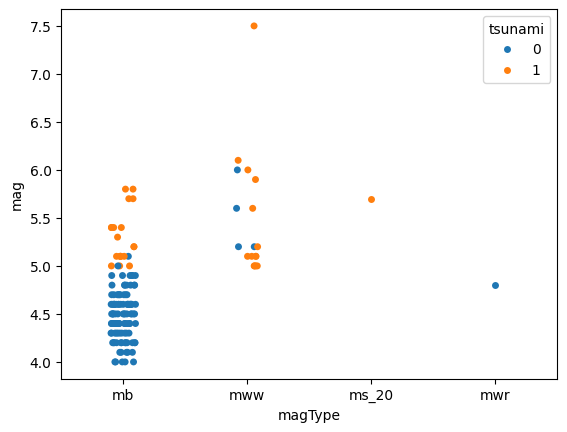

In [32]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


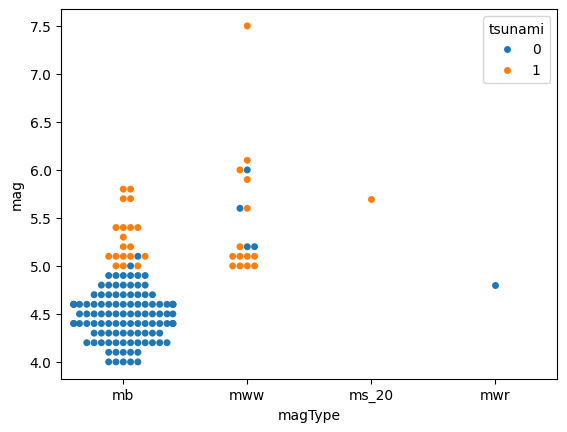

In [33]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: >

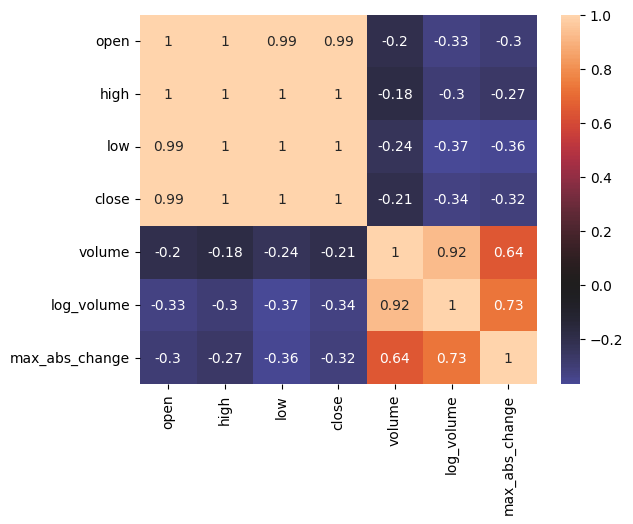

In [34]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(),
 annot=True, center=0
)


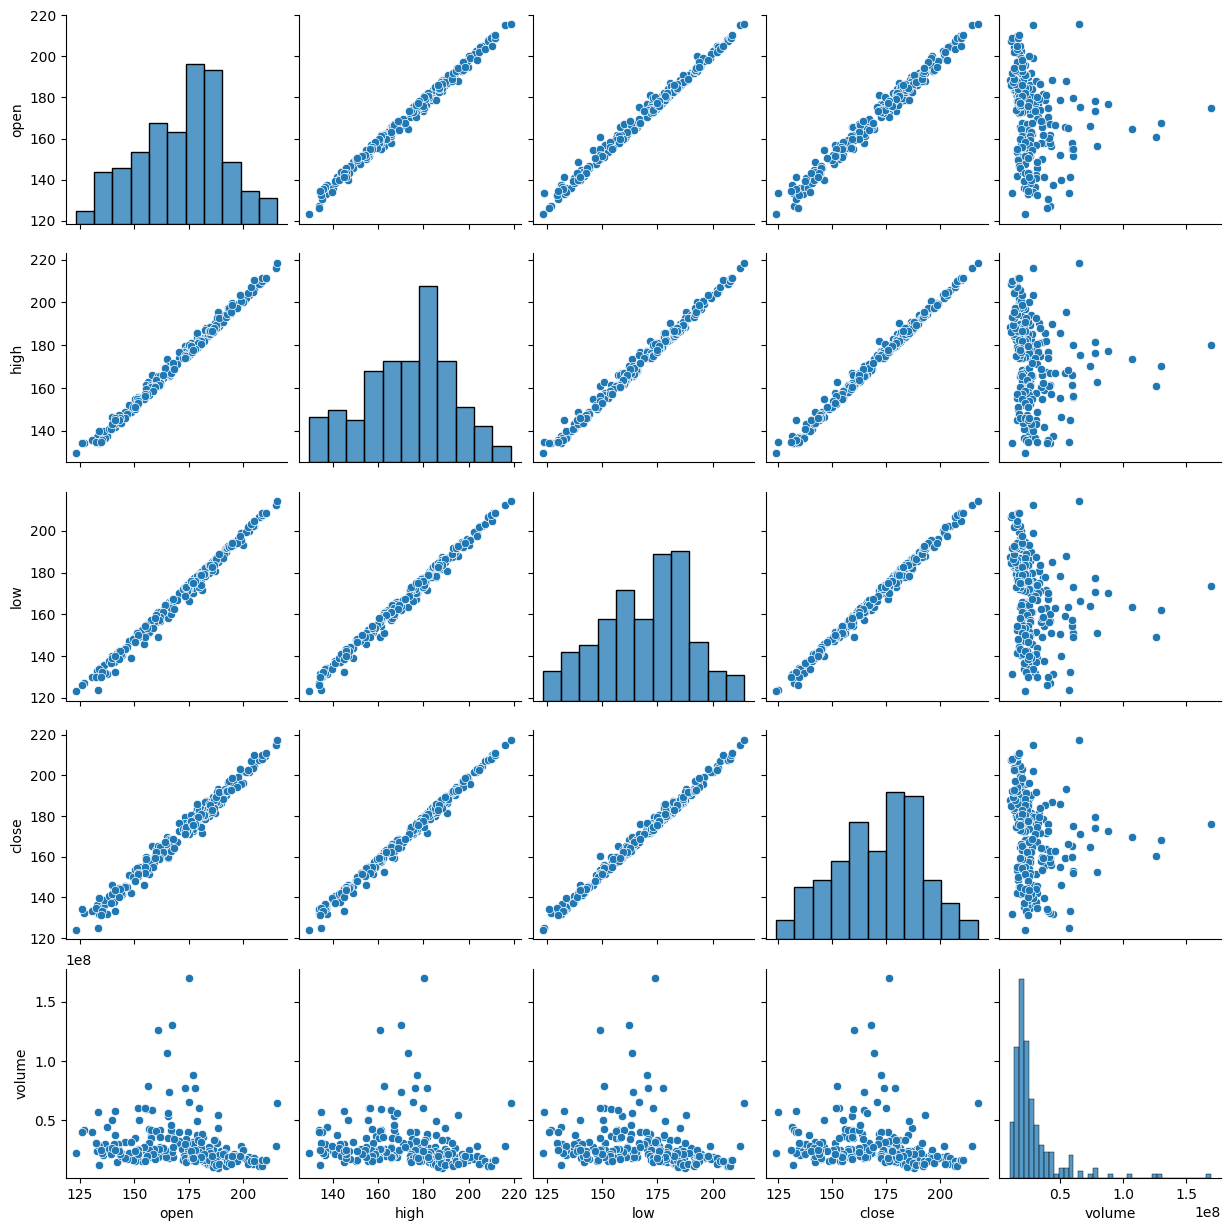

In [35]:
sns.pairplot(fb)

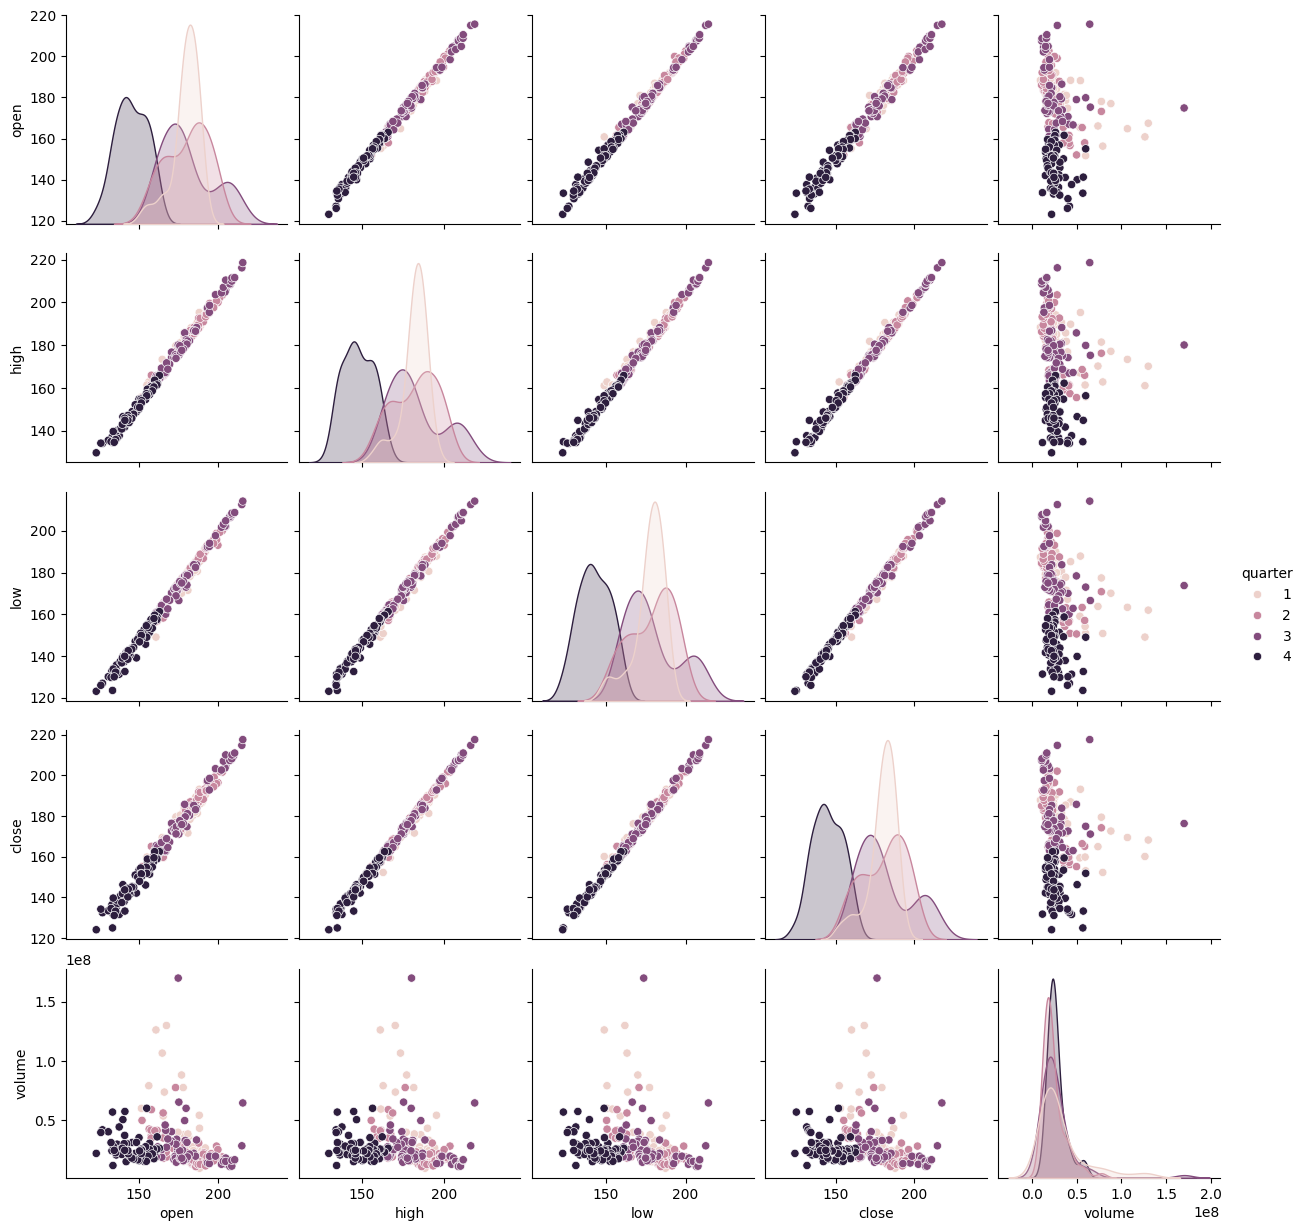

In [36]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

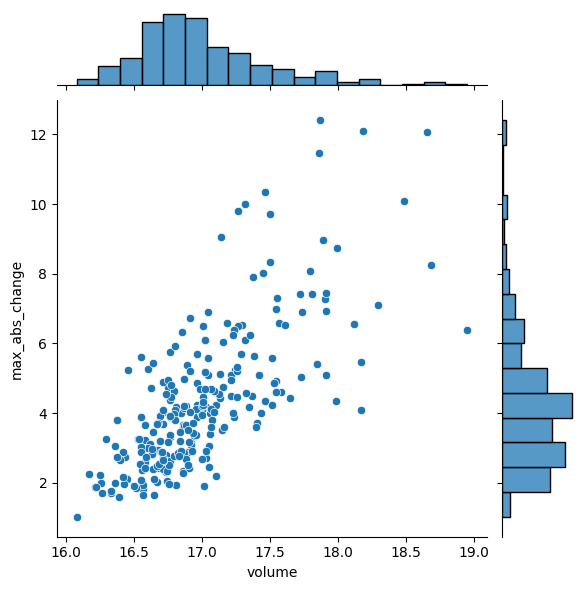

In [37]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

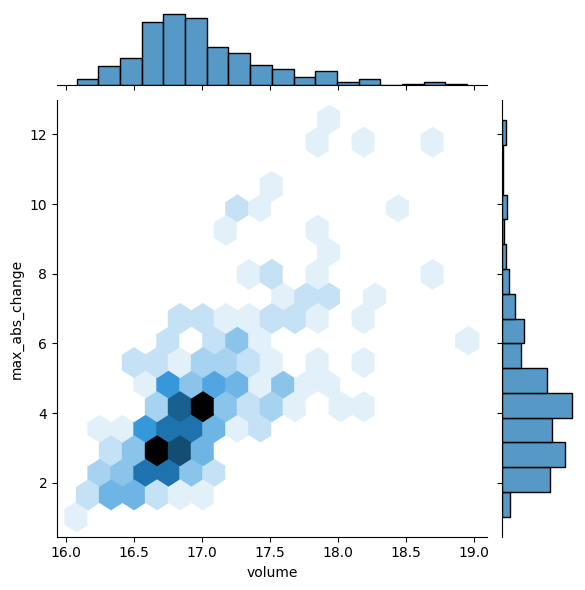

In [38]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

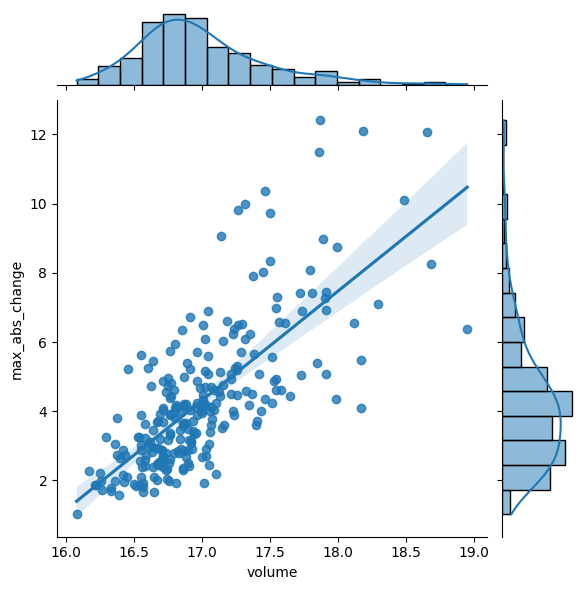

In [39]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


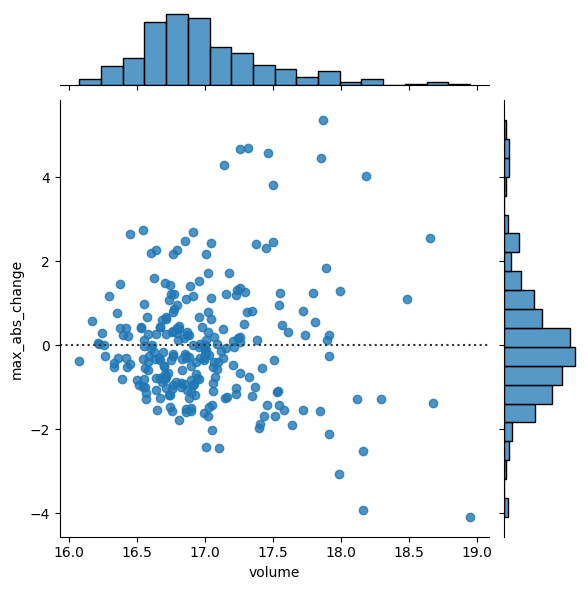

In [40]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

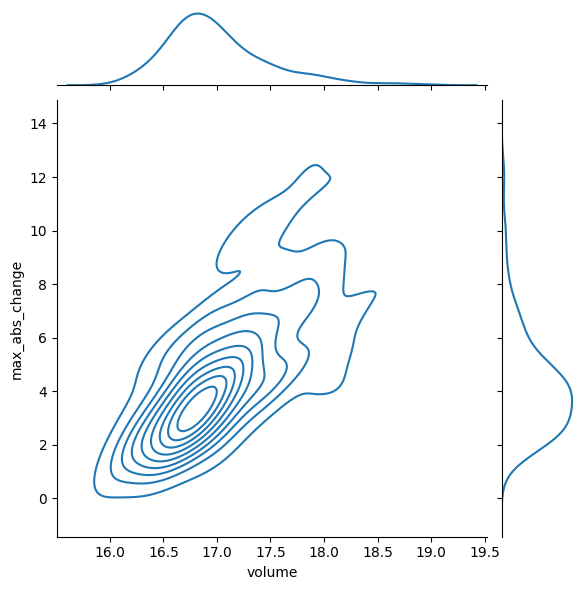

In [41]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

In [42]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [43]:
import itertools

In [44]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [45]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


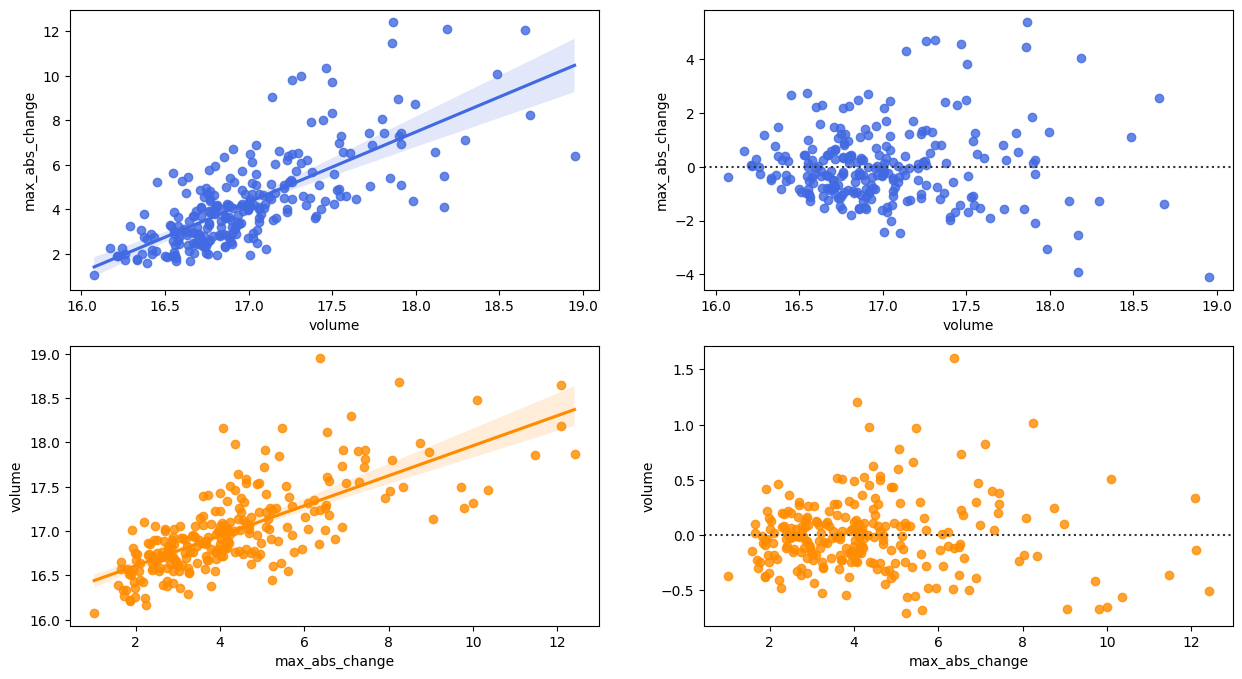

In [46]:
from reg_resid_plot import reg_resid_plots
reg_resid_plots(fb_reg_data)

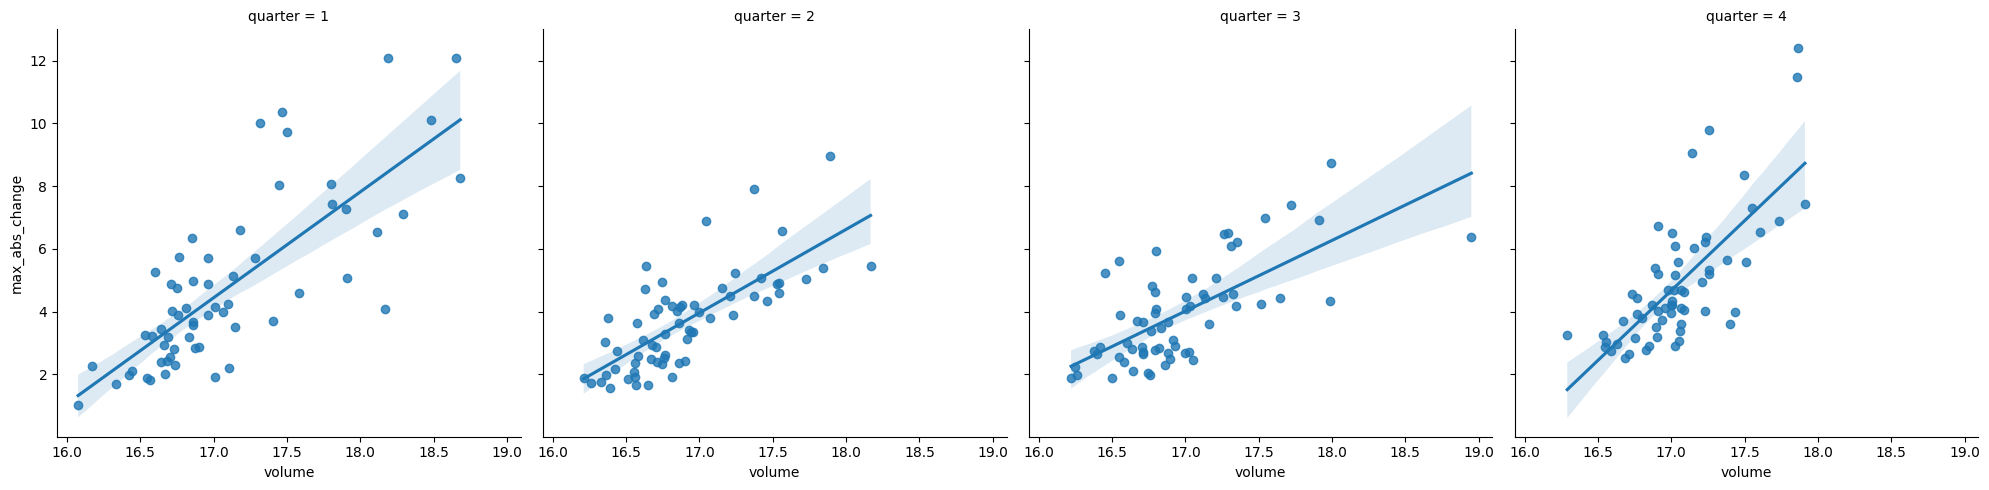

In [47]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

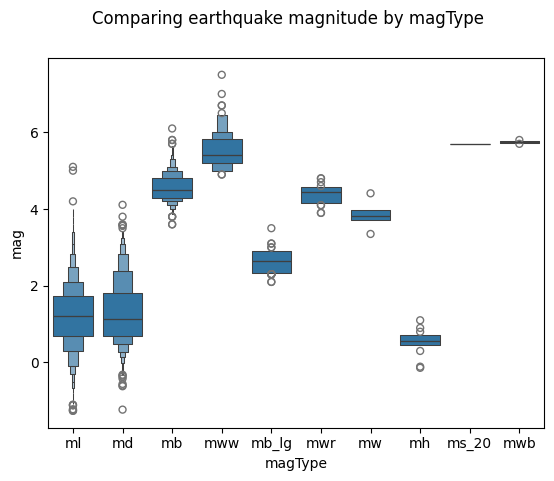

In [48]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

<ipython-input-49-bd4e17637bf6>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

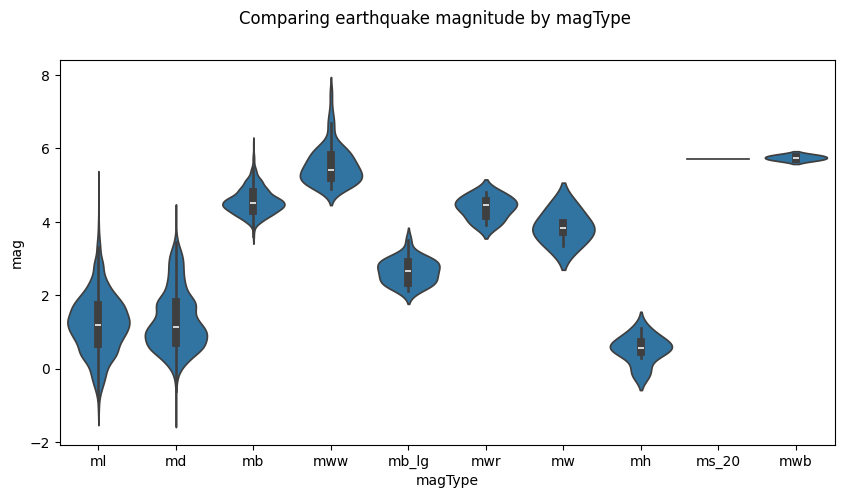

In [49]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')

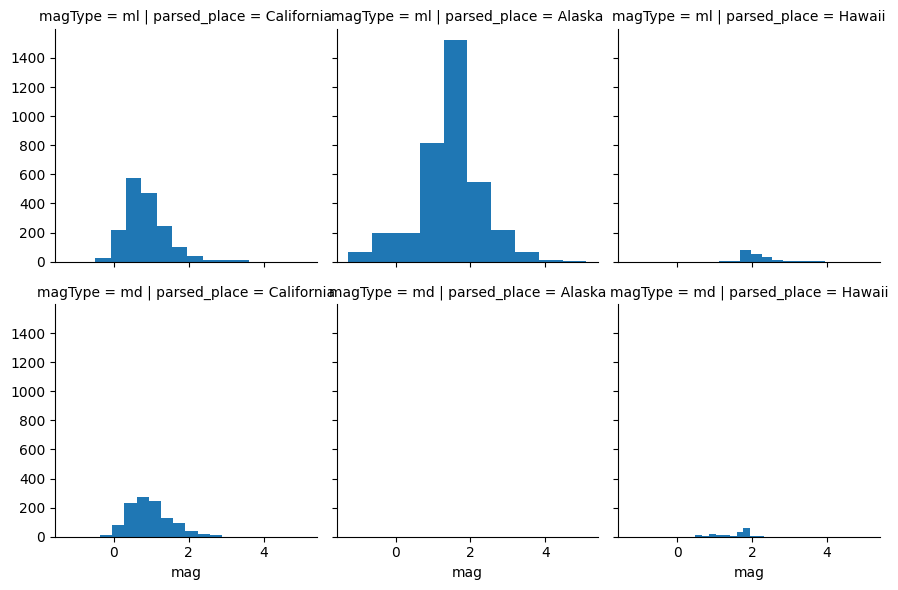

In [50]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')

9.5 Formatting Plots



In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

Text(0, 0.5, 'price ($)')

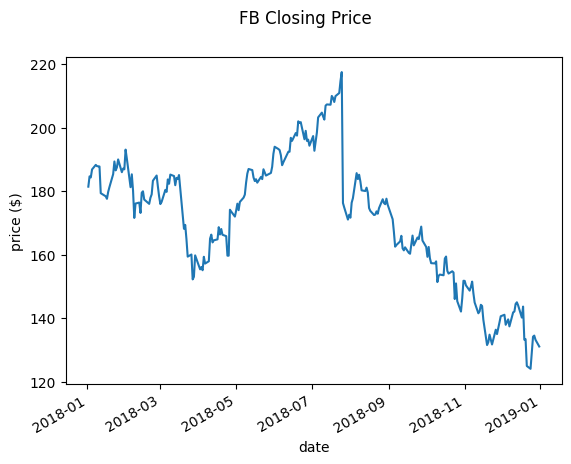

In [52]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

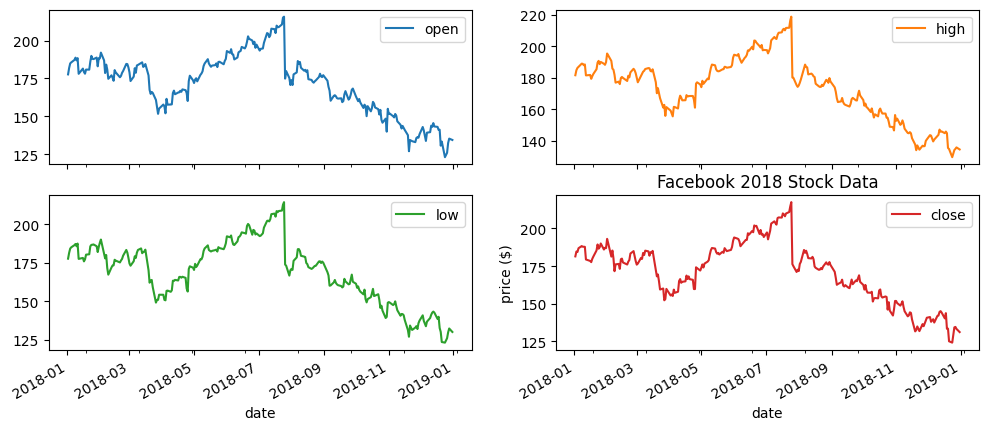

In [53]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

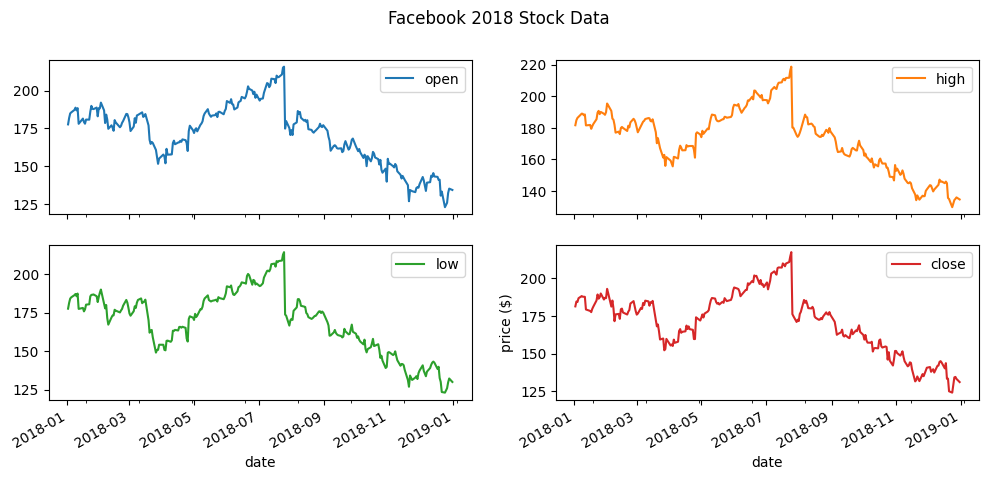

In [54]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

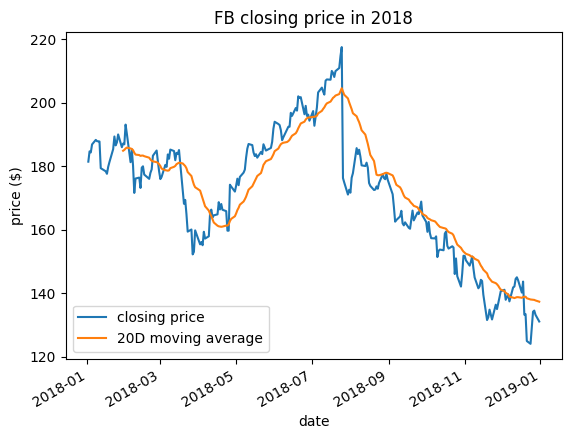

In [55]:
fb.assign(
 ma=lambda x: x.close.rolling(20).mean()
).plot(
 y=['close', 'ma'],
 title='FB closing price in 2018',
 label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

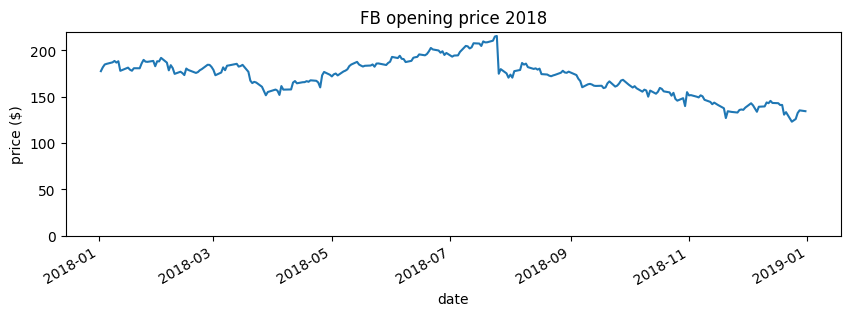

In [56]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

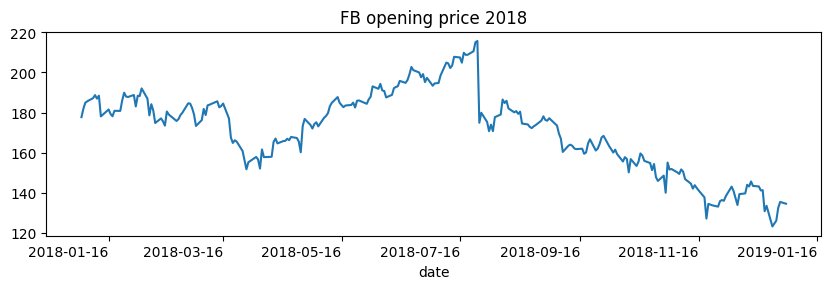

In [58]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

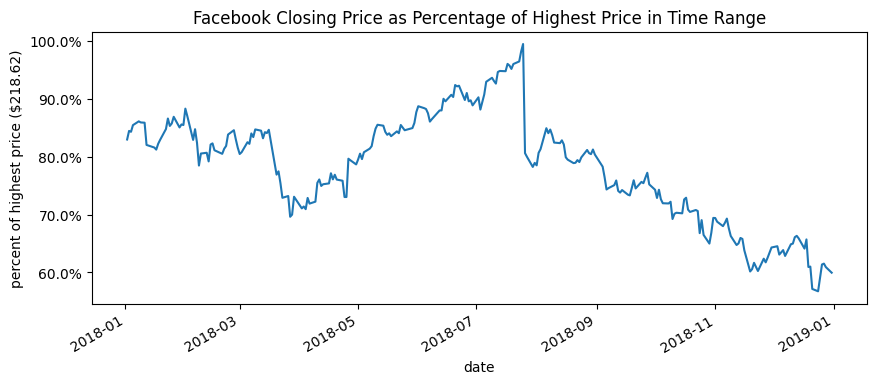

In [59]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
 figsize=(10, 4),
 title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
 ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
 fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

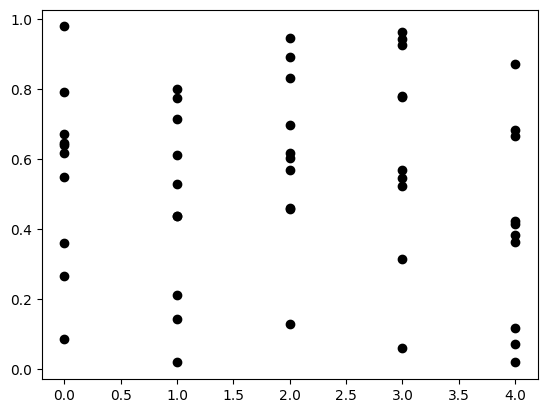

In [60]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')

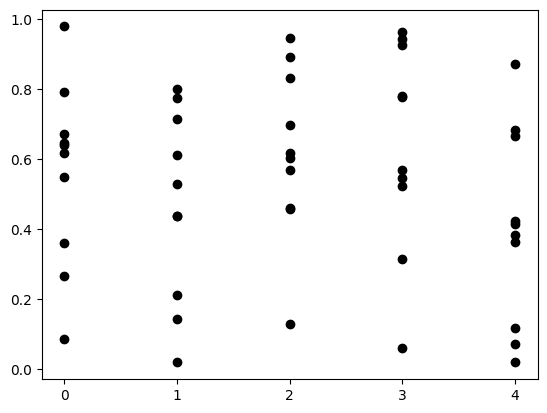

In [61]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
 ticker.MultipleLocator(base=1)
)

9.6 Customizing Visualizations

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

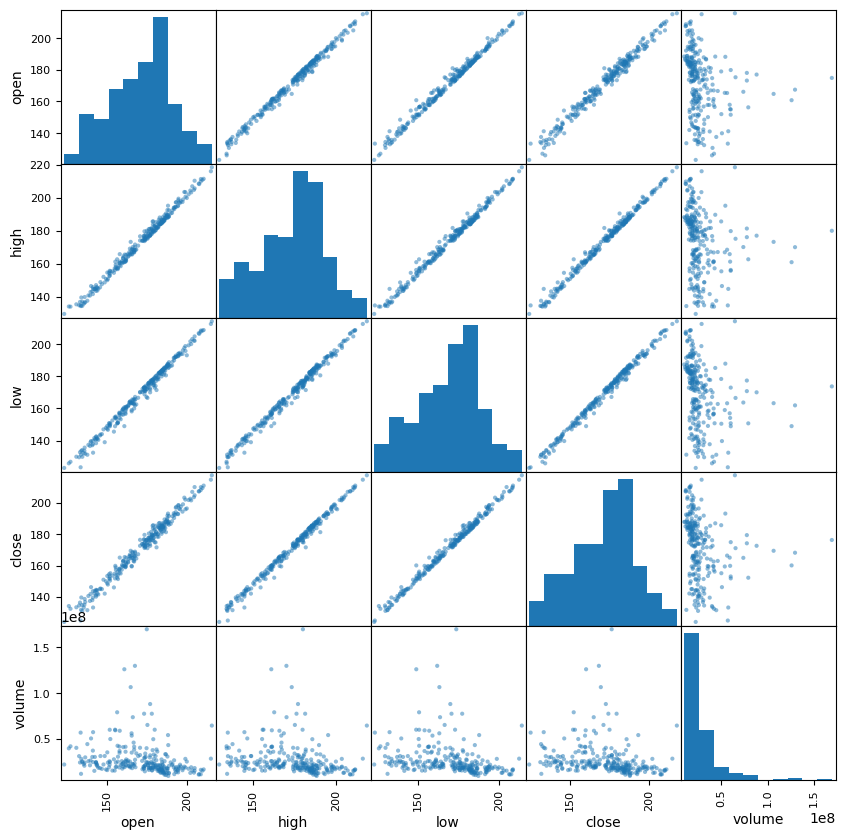

In [64]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

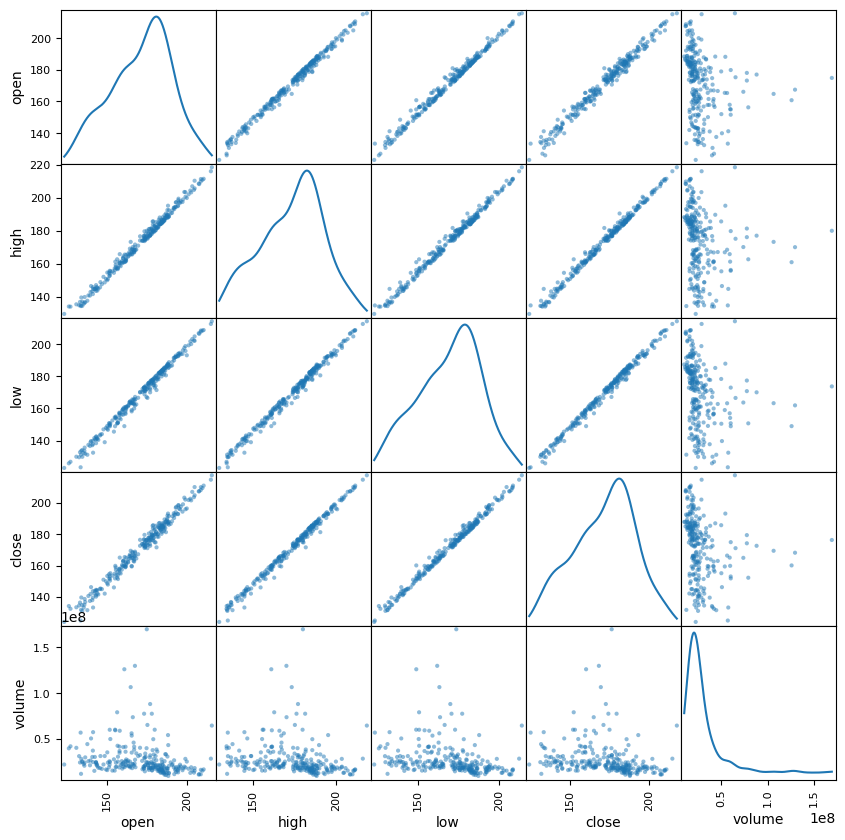

In [65]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

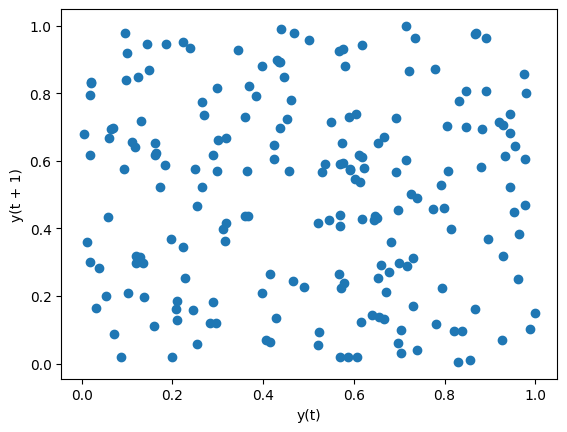

In [66]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

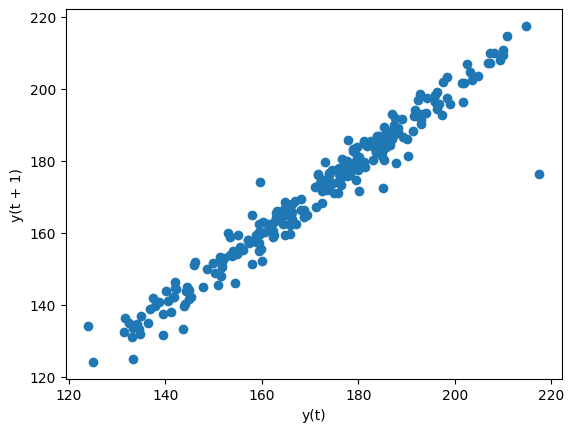

In [67]:
lag_plot(fb.close)

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

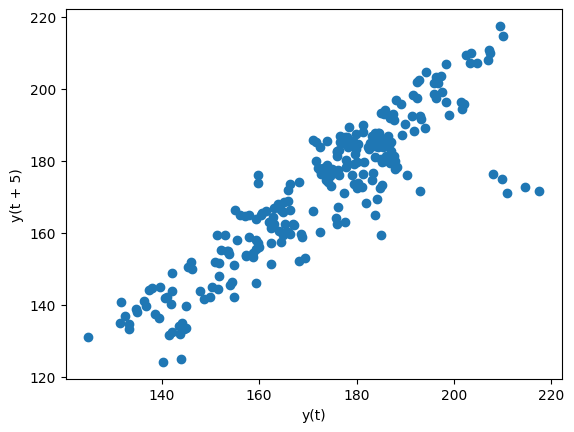

In [68]:
lag_plot(fb.close, lag=5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

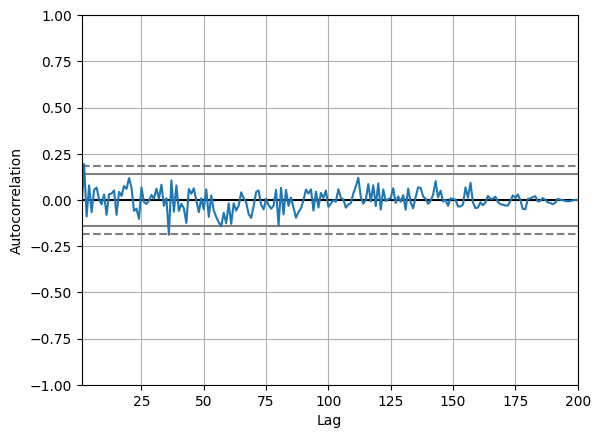

In [69]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

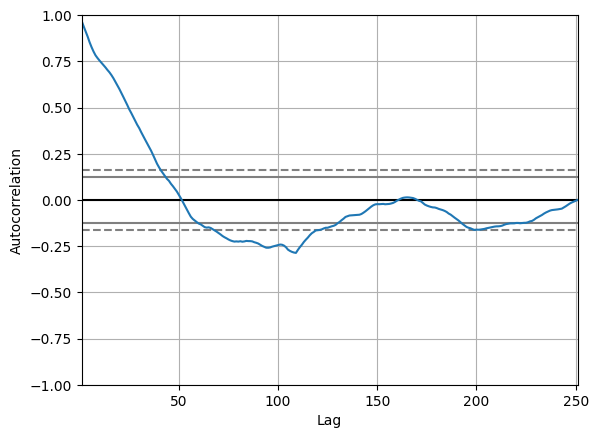

In [70]:
autocorrelation_plot(fb.close)

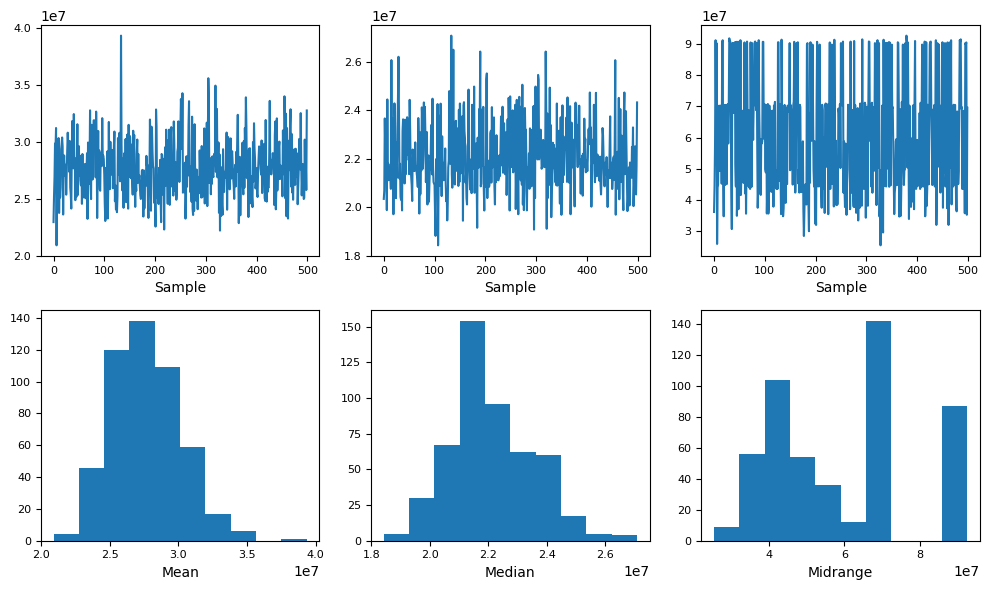

In [71]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

#Supplementary Activity:
Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
3. Fill in the area between the bounds in the plot from exercise #2.
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:


*   Disappointing user growth announced after close on July 25, 2018
*   Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
*   
FTC launches investigation on March 20, 2018
6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

# Load data
fb_data = pd.read_csv("fb_stock_prices_2018.csv")
earthquake_data = pd.read_csv("earthquakes-1.csv")

#1.

<Axes: >

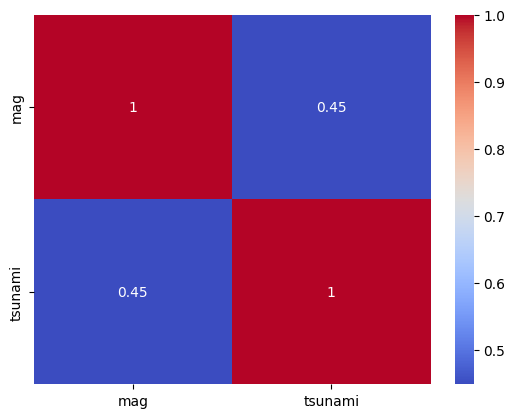

In [77]:
earthquake_data2= earthquake_data.query('magType == "mb"')[['mag','tsunami']]
sns.heatmap(earthquake_data2.corr(), cmap='coolwarm', # identify their correlation
          annot = True)

#2.

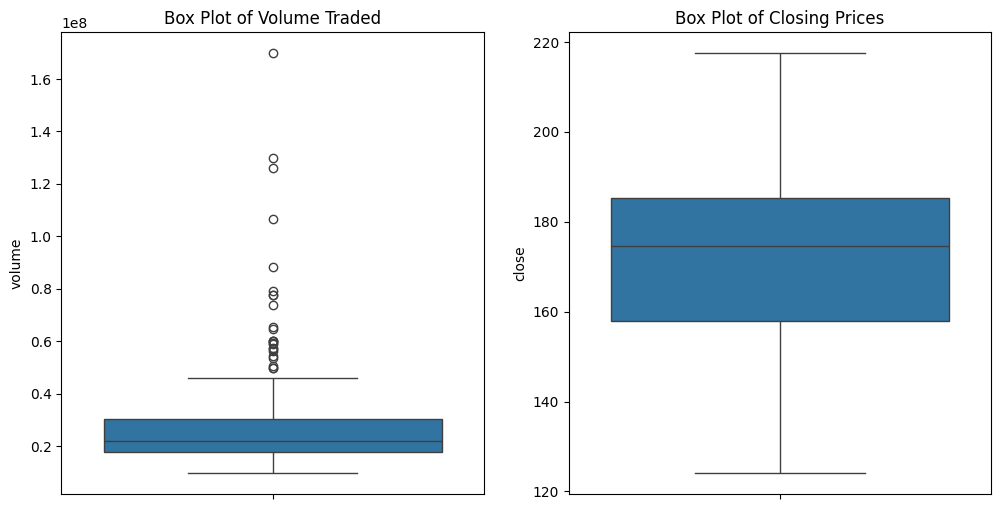

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=fb_data['volume'], ax=axes[0]) # Box plot for Volume Traded
axes[0].set_title('Box Plot of Volume Traded')
sns.boxplot(y=fb_data['close'], ax=axes[1]) # Box plot for Closing Prices
axes[1].set_title('Box Plot of Closing Prices')
plt.show()

#3.

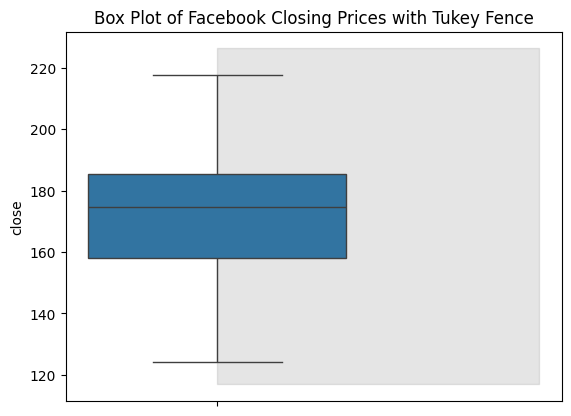

In [82]:
fig, ax = plt.subplots()
sns.boxplot(y=fb_data['close'], ax=ax)
q1 = fb_data['close'].quantile(0.25)
q3 = fb_data['close'].quantile(0.75)
iqr_val = iqr(fb_data['close'])
lower_bound = q1 - 1.5 * iqr_val # Fill area between bounds
upper_bound = q3 + 1.5 * iqr_val # Fill area between bounds
ax.fill_betweenx([lower_bound, upper_bound], 0, 1, alpha=0.2, color='grey')
plt.title('Box Plot of Facebook Closing Prices with Tukey Fence')
plt.show()

#4.

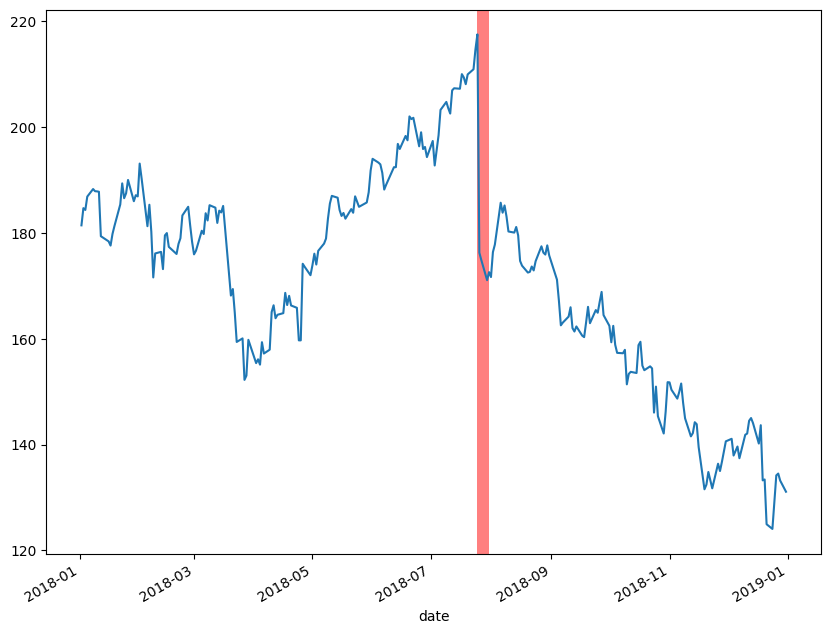

In [85]:
fb_1 = pd.read_csv('/content/fb_stock_prices_2018.csv')
fb_1['date'] = pd.to_datetime(fb_1['date'])
fb_1.set_index('date', inplace = True) # set the index
start = '2018-07-25'
end = '2018-07-31'
fb_1.close.plot(figsize = (10,8)) # plotting close column
plt.axvspan(start, end, facecolor = 'red', alpha = 0.5)


#5.

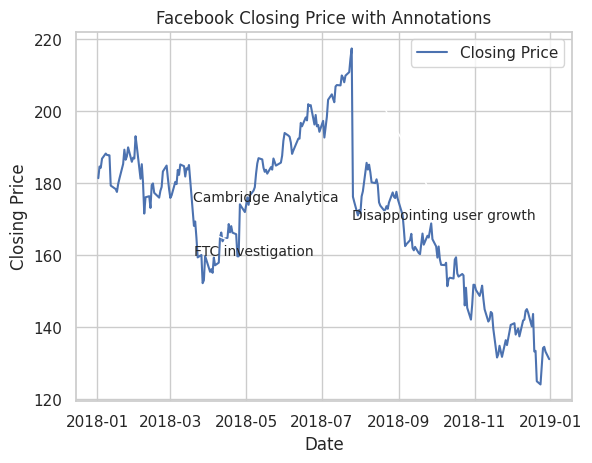

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

fb_data = pd.read_csv("fb_stock_prices_2018.csv")
fb_data['date'] = pd.to_datetime(fb_data['date']) # Convert dates to datetime objects
fig, ax = plt.subplots() # Create the plot
ax.plot(fb_data['date'], fb_data['close'], label='Closing Price')

events = [
    ('Disappointing user growth', '2018-07-25', 170),
    ('Cambridge Analytica', '2018-03-19', 175),
    ('FTC investigation', '2018-03-20', 160)
]

for label, date, y_coord in events:
    date = pd.to_datetime(date)
    ax.annotate(label, xy=(date, fb_data.loc[fb_data['date'] == date, 'close'].iloc[0]),
                xytext=(date, y_coord), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.title('Facebook Closing Price with Annotations')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

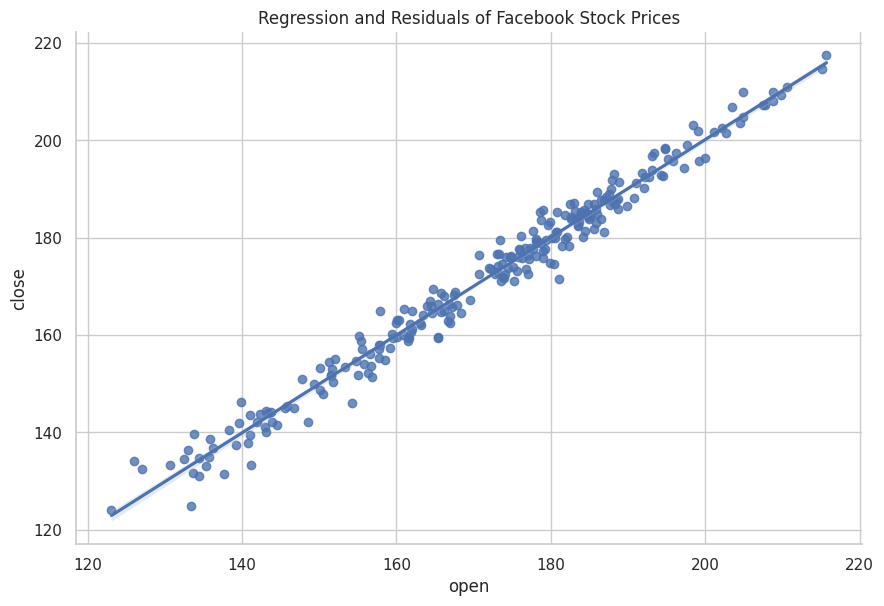

In [89]:
def reg_resid_plots(df, x, y, title=None, cmap='viridis'):
    sns.set(style="whitegrid")
    g = sns.lmplot(x=x, y=y, data=df, aspect=1.5, height=6, palette=cmap)
    if title:
        plt.title(title)
    plt.show()

# Example usage:
reg_resid_plots(fb_data, 'open', 'close', title='Regression and Residuals of Facebook Stock Prices')

#Conclusion

I used seaborn's heatmap to see if earthquake strength links to tsunamis. Additionally, I learned how to customize the visual aids of our graph, exploring different visuals in the process. Then, I used box plots and line plots to check out Facebook's trading volume and closing prices, understanding the importance of representing data accurately. I found any strange points and events that shook up stock prices. When I struggled to draw lines for Tukey fence bounds, I used debugging tricks to fix it. These tasks showed how important it is to be good at visualizing data and fixing problems to understand complex info better. Learning how to customize the visuals of our plots is important because if the visual looks of our plot is unpleasant to the eye, or some colors and lines mismatched on our plot, we may interpret our data incorrectly.